In [183]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt,cm
from scipy.stats import mannwhitneyu as mwu

In [167]:
data = pd.read_excel('Final_FE_data.xlsx',sheet_name='Sheet1')

# Method adopted from Rosche and Foster, Methods, 2000

In [206]:
def generate_mms_reftable(m_min=0.1,m_max=15,N=1000,R=200):
    M_list = np.linspace(m_min,m_max,N)
    m_matrix = []
    for m in M_list:
        p0 = np.e**(-m)
        pr_list = [p0]
        for r in range(1,R):
            pr_list.append((m/r)*np.sum(np.array([pr_list[i]/(r-i+1) for i in range(0,r)])))
        m_matrix.append(pr_list)
    return np.array(M_list),np.array(m_matrix)

def mms_CI(m,n):
    sigma = 1.225*(m**-0.315)/np.sqrt(n)
    c1 = np.log(m)+1.96*sigma*((np.e**(1.96*sigma))**-0.315)
    c2 = np.log(m)-1.96*sigma*((np.e**(1.96*sigma))**0.315)
    return np.e**(c1),np.e**(c2)

def mms_ln_prob(cfus,M,m_matrix):
    cfus = np.array(cfus)
    cfus[cfus>=150]=150
    m = M[np.argmax(np.log(m_matrix)[:,np.array(cfus)].sum(axis=1))]
    c1,c2 = mms_CI(m,len(cfus))
    return m,c1,c2

#### Set MMS reference table:

In [175]:
M,m_matrix = generate_mms_reftable()

(1e-09, 1e-07)

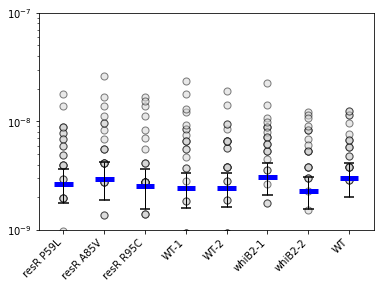

In [211]:
strains = data['Strain'].unique()
mut_stats = []
for i in range(len(mutation_rates)):
    cfus = data[data['Strain']==strains[i]]['CFU']
    nt = data[data['Strain']==strains[i]]['Nt'].unique()[0]
    m,c1,c2 = mms_ln_prob(cfus,M,m_matrix)
    plt.scatter([i]*len(cfus), data[data['Strain']==strains[i]]['Frequency'],alpha=0.5,s=50,
                fc='lightgrey',ec='black')
    plt.hlines(y=[c1/nt,c2/nt],xmin=i-0.13,xmax=i+0.13,color='black')
    plt.hlines(y=[m/nt],xmin=i-0.23,xmax=i+0.23,color='b',lw=5)
    plt.vlines(x=i,ymin=c1/nt,ymax=c2/nt,color='black',lw=1)
    mut_stats.append([strains[i],nt,np.median(cfus),m/nt,c1/nt,c2/nt])
plt.xticks(np.arange(len(strains)),strains,rotation = 45,ha='right',va='top')
plt.yscale('log')
plt.ylim(1e-9,1e-7)

In [212]:
mut_stats = pd.DataFrame(mut_stats,columns=['Strain',
                                            'Nt (input CFU)',
                                            'median CFU per plate',
                                            'μ (estimated mutation rate)',
                                            '95% CI+ of μ',
                                            '95% CI- of μ'])

In [213]:
mut_stats.to_excel('/Users/jz-rolling/Desktop/OMEGA_GUI/notebooks/QY_Rv1830/Fluctuation_analysis/fluctuation_output.xlsx')